# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd

In [35]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')
products_df = pd.read_csv('/datasets/products.csv', ';')
aisles_df = pd.read_csv('/datasets/aisles.csv', ';')
departments_df = pd.read_csv('/datasets/departments.csv', ';')
order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con la carga de la información. Solamente recuerda agregar  sep=';' para separar las variables

In [105]:
orders_df.info()
orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [106]:
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [107]:
aisles_df.info()
aisles_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [108]:
departments_df.info()
departments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [109]:
order_products_df.info()
order_products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

Al importar las tablas de datos a DataFrames es el principio fundamental ya que va a permitir que manipulemos, transformemos y visualicemos los datos de manera clara y eficiente.
Al usar info() podemos obtener un resumen del DataFrame, sabemos el numero de columnas y filas, el tipo de datos en cada columna (identificar el tipo de dato nos permitira transformarlo), los valores no nulos en cada columna y el uso de memoria que ocupan los datos. Obteniendo la información anterior podremos detectar NaN e identificar los tipos de valores incorrectos. 
Agregue head() para obtener una vista rapida de las primeras cinco filas del DataFrame, nos da una idea de como la tabla de datos esta confirmada, por cuantas columnas y confirmar los tipos de valores. 



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para verificar y corregir los tipos de datos 
Usaria el metodo info() para inspeccionar que tipo de datos hay en cada columna, el siguiente paso seria asegurnos que las columnas como 'product_id', 'order_id' esten definidas como 'int' ya que ocupan menos espacio que las cadenas de texto y en algunas raras ocasiones se pueden usar operaciones matematicas en columnas como 'user_id' para calcular diferencia entre un id de usuario y otro. Para convertir product_id' u 'order_id' podriamos utilizar el metodo .astype('int'). Seguiria con verificar que no haya valores erroneos o negativos y confirmarlo con info().


Para identificar y completar los valores ausentes
El primer paso es identificar qué columnas tiene valores ausentes (NaN)
Utilizaria metodos como isna() o isnull() y despues agregaria sum() para que pueda contar y sumar el numero de NaN en cada columna 


Pasra identificar y eliminar los valores duplicados 
Si hay filas con NaN aplicaria dropna() en el df
Si conviene para el analisis o la presentacion usaria fillna() agregando un 0, o incluso un espacio en blanco con " ". 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [111]:
# Revisa si hay pedidos duplicados
import pandas as pd

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

orders_duplicates = orders_df[orders_df.duplicated()]
print(orders_duplicates)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si, ¿qué tienen en común? El día y la hora en la que fueron hechas 

In [9]:

print(orders_df.duplicated().sum())

orders_duplicates = orders_df[orders_df.duplicated()]
print(orders_duplicates)

orders_df_cleaned = orders_df.drop_duplicates()

print(orders_df_cleaned.duplicated().sum())

wednesday_2am_orders = orders_df_cleaned[(orders_df_cleaned['order_dow'] == 3) & (orders_df_cleaned['order_hour_of_day'] == 2)]

print("\nPedidos realizados el miércoles a las 2:00 a.m.:")
print(wednesday_2am_orders)


15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Qué sugiere este resultado? Hay 106 ordenes que fueron hechas el miercoles a las 2am 

In [112]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv')
orders_df = orders_df.drop_duplicates()

In [113]:
print(orders_df.duplicated().sum())


0


In [12]:

import pandas as pd

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

duplicate_order_ids = orders_df[orders_df.duplicated(subset=['order_id'])]
print(duplicate_order_ids)




        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Describe brevemente tus hallazgos y lo que hiciste con ellos
Buscamos las filas duplicadas en la columna "order_id", se filtro el DataFrame original y seleccionamos solo para mostrar las filas duplicadas 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
import pandas as pd
products_df = pd.read_csv('/datasets/products.csv', ';')

print(products_df.isnull().sum())

new_products_df = products_df.dropna()
print(new_products_df.isnull().sum())

duplicated_products_df = products_df.duplicated()
print(duplicated_products_df.sum())


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados

import pandas as pd
products_df = pd.read_csv('/datasets/products.csv', ';')

duplicados_departamento = products_df.duplicated('department_id')

print(duplicados_departamento)


0        False
1        False
2        False
3        False
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


In [46]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
import pandas as pd

products_df = pd.read_csv('/datasets/products.csv', sep=';')

products_df['product_name'] = products_df['product_name'].str.upper()

duplicated_products_df = products_df[(~products_df['product_name'].isna()) & products_df['product_name'].duplicated()]

print(duplicated_products_df)

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

In [114]:
# Revisa si hay nombres duplicados de productos no faltantes

products_df['product_name'].value_counts()

#products_df['product_name'].nunique()

GREEN TEA WITH GINSENG AND HONEY            3
TOMATO AND BASIL PASTA SAUCE                2
FIRE ROASTED DICED TOMATOES WITH GARLIC     2
MARASCHINO CHERRIES WITH STEMS              2
PINEAPPLE SLICES IN 100% PINEAPPLE JUICE    2
                                           ..
ORGANIC ONION GRANULES                      1
ONION POWDER                                1
GRASS FED GHEE                              1
SAUSAGE  LINKS                              1
HAZELNUT GOURMET COFFEE CREAMER             1
Name: product_name, Length: 48332, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
49694 - 48332 = 1362


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
import pandas as pd

departments_df = pd.read_csv('/datasets/departments.csv', ';')

duplicated_row = departments_df.duplicated().sum()

print(duplicated_row)

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos

products_df['product_id'] = products_df['product_id']
print(products_df.head())

duplicated_product_id = products_df.duplicated('product_id')
print(duplicated_product_id)

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay lineas duplicadas en la tabla de products, hay 49694 filas y 'product_id' indica un número de identificación unico para cada producto. Entonces podemos resumir que existen 49694 productos diferentes

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
import pandas as pd

aisles_df = pd.read_csv('/datasets/aisles.csv', ';')

dup_row_aisle = aisles_df.duplicated().sum()

print(dup_row_aisle)


0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos

dup_aisle_id = aisles_df.duplicated('aisle_id')

print(dup_aisle_id)


0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay lineas duplicadas en la tabla de products, hay 134 filas y 'aisle_id' indica un número de identificación unico para cada pasillo (aisle). Entonces podemos resumir que existen 134 pasillos diferentes en la tienda. 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
import pandas as pd 

order_products_df = pd.read_csv('/datasets/order_products.csv')

dup_order_products = order_products_df.duplicated().sum()

print(dup_order_products)


0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(dup_order_products)



0


Describe brevemente tus hallazgos y lo que hiciste con ellos. No hay ordenes duplicadas o iguales en la tabla de order_products

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [116]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products_df['product_name'].isnull().sum())
# ausentes_product_name = products_df[(products_df['product_name'] == None)]
missing_names = products_df['product_name'].isnull()
ausentes_product_names = products_df[missing_names]
ausentes_product_names.head(10)



1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
439,440,NaN,100,21
471,472,NaN,100,21
490,491,NaN,100,21
555,556,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Hay 1258 lineas en las que en la columna de "product_name" tienen valores nulos/ausentes, hay 1258 productos que no tienen nombre 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

filtered_products_df = ausentes_product_names[ausentes_product_names['aisle_id'] == 100]

print(filtered_products_df)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. Hay 1258 lineas en las que en la columna de "product_name" tienen valores nulos/ausentes, hay 1258 productos que no tienen nombre Los 1258 productos que no tienen nombre estan localizados en el mismo pasillo (aisle)

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

filtered_products_dep = ausentes_product_names[ausentes_product_names['department_id'] == 21]

print(filtered_products_dep)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Hay 1258 lineas en las que en la columna de "product_name" tienen valores nulos/ausentes, hay 1258 productos que no tienen nombre
Los 1258 productos que no tienen nombre estan localizados en el mismo departamento 

In [119]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
department_21_df = departments_df[departments_df['department_id'] == 21]
print(department_21_df)
aisle_100_df = aisles_df[aisles_df['aisle_id'] == 100]
print(aisle_100_df)



    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos. Pasillo #100 no tiene nombre y el Departamento #21 tampoco tiene nombre en la tabla 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products_desconocido = products_df.fillna('Unknown')
print(products_desconocido)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Hay 1258 lineas en las que en la columna de "product_name" tienen valores nulos/ausentes, hay 1258 productos que no tienen nombre. 
Los 1258 productos que no tienen nombre estan localizados en el mismo pasillo y en el mismo departamento.
Hay 1258 productos que ahora llevan "Unknown" como nombre del producto

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
import pandas as pd

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

val_ausentes_orders = orders_df.isnull().sum()

print(val_ausentes_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

null_values = orders_df[orders_df['days_since_prior_order'].isnull()]

first_orders_null_values = null_values[null_values['order_number'] == 1]

other_null_values = null_values[null_values['order_number'] != 1]

print(f"Valores nulos en el primer pedido: {first_orders_null_values.shape[0]}")
print(f"Valores nulos en otros pedidos: {other_null_values.shape[0]}")


Valores nulos en el primer pedido: 28819
Valores nulos en otros pedidos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes

import pandas as pd

order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')

val_ausentes_orders = order_products_df.isnull().sum()

print(val_ausentes_orders)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

min_add_to_cart_order = order_products_df['add_to_cart_order'].min()
max_add_to_cart_order = order_products_df['add_to_cart_order'].max()

print(min_add_to_cart_order)
print(max_add_to_cart_order)



1.0
64.0


Describe brevemente cuáles son tus hallazgos.
'add_to_cart_order' indica el orden secuencial en el que se añadió cada artículo en el carrito. Hay ordenes que tan solo tienen 1 producto y el maximo de productos que una orden tiene es 64

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
 
orders_null_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isnull()]

print(orders_null_add_to_cart)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [120]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print(orders_null_add_to_cart.duplicated('order_id').sum())

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
ausente_grouped_by_id = orders_null_add_to_cart.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
display(ausente_grouped_by_id.agg(product_count=('product_id','count')))
display(ausente_grouped_by_id.agg(product_count=('product_id','count')).min())
display(ausente_grouped_by_id.agg(product_count=('product_id','count')).max())


766


,product_count
order_id,
9310,1
61355,63
102236,31
129627,5
165801,6
...,...
2999801,6
3125735,22
3308010,51


product_count    1
dtype: int64

product_count    63
dtype: int64

Describe brevemente cuáles son tus hallazgos. Hay 766 ordenes que tienen 64 productos

In [45]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

#val_ausentes_999 = orders_null_add_to_cart['add_to_cart_order'].fillna(999)

orders_null_add_to_cart = orders_null_add_to_cart.copy() 

orders_null_add_to_cart['add_to_cart_order'] = orders_null_add_to_cart['add_to_cart_order'].fillna(999).astype(int)

orders_null_add_to_cart.head(10)


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
34183,844733,32717,999,0
57981,61355,5322,999,0
58228,936852,31373,999,1
62655,264710,40281,999,0
64336,1717990,39408,999,0


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
La manipulación de los DataFrame nos permite obtener bastante información acerca de las ordenes hechas, cuantos productos hay en cada orden, el nombre de los productos, de los pasillos y de los departamentos donde se ecnuentran los mismos. Hay valores ausentes en el pasillo 100 lo que tiene sentido ya que pertenecen al mismo departamento.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [77]:
import pandas as pd
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

# Confirmar que los valores esten en los rangos 
hour_range_ok = orders_df['order_hour_of_day'].between(0, 23)
dow_range_ok = orders_df['order_dow'].between(0, 6)

# Filas con valores fuera de rango en 'order_hour_of_day'
print("Filas con valores fuera de rango en 'order_hour_of_day':")
print(orders_df.loc[~hour_valid])

# Filas con valores fuera de rango en 'order_dow'
print("\nFilas con valores fuera de rango en 'order_dow':")
print(orders_df.loc[~dow_valid])

Filas con valores fuera de rango en 'order_hour_of_day':
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Filas con valores fuera de rango en 'order_dow':
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Escribe aquí tus conclusiones: Todas las ordenes estan dentro del rango de dias de la semana 0-6 y dentro de las horas 0-23. Ninguna orden tiene como dia de la semana 7 u 8 (porque serian datos incorrectos), lo mismo con las horas de la semana 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

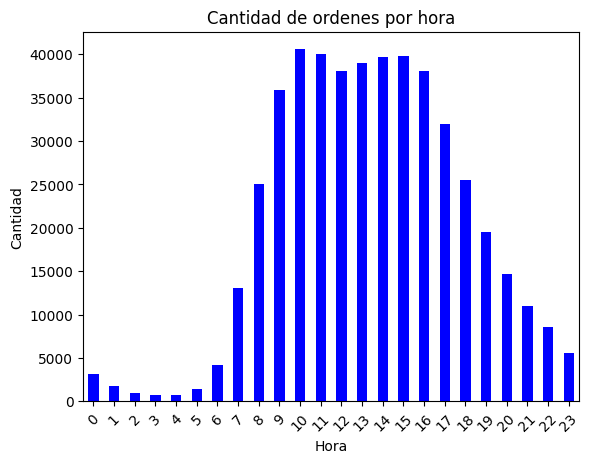

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

orders_per_hour = orders_df['order_hour_of_day'].value_counts().sort_index()

orders_per_hour.plot(x='order_hour_of_day',
                     y='orders_per_hour',
                     kind='bar',
                     color='blue',
                     title='Cantidad de ordenes por hora',
                     xlabel='Hora',
                     ylabel='Cantidad',
                     rot=45)

plt.show()


*Con la ayuda del grafico podemos determinar que las horas en las que más se concentran las ordenes hechas por usuarios es de las 10:00 a 16:00 hrs, alcanzando casi las 40,000 ordenes hechas a las 10:00

### [A3] ¿Qué día de la semana compran víveres las personas?

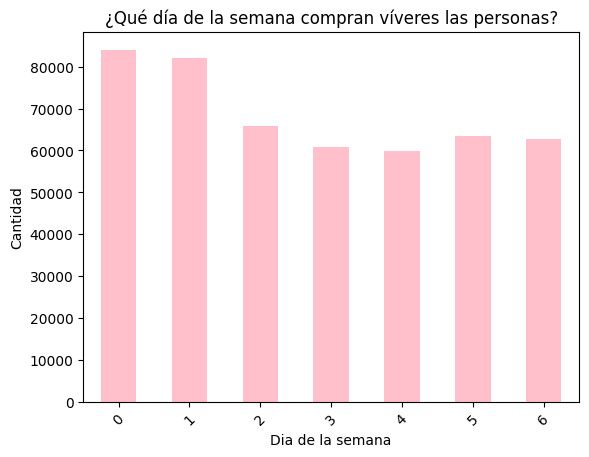

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

orders_per_day = orders_df['order_dow'].value_counts().sort_index()

orders_per_day.plot(x='order_dow',
                     y='order_id',
                     kind='bar',
                     color='pink',
                     title='¿Qué día de la semana compran víveres las personas?',
                     xlabel='Dia de la semana',
                     ylabel='Cantidad',
                     rot=45)

plt.show()



Con la ayuda del grafico podemos determinar que la mayoria de las ordenes son hechas a inicio de semana (domingo y domingo)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

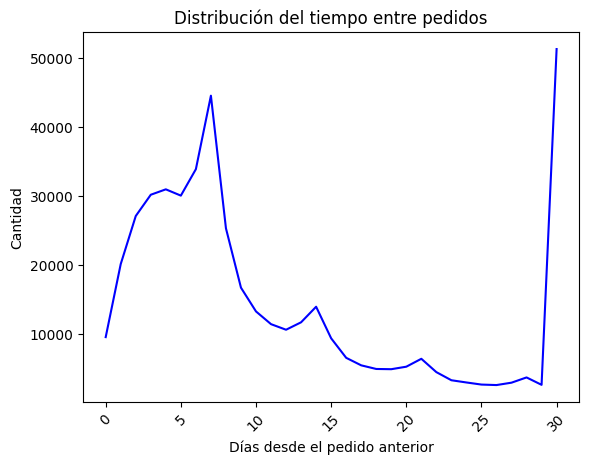

Tiempo mínimo entre pedidos: 0.0 días
Tiempo máximo entre pedidos: 30.0 días


In [66]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

orders_since_prior_orders = orders_df['days_since_prior_order'].value_counts().sort_index()

orders_since_prior_orders.plot(x='orders_since_prior_orders',
                               y='order_id',
                               color='blue',
                               title='Distribución del tiempo entre pedidos',
                               xlabel='Días desde el pedido anterior',
                               ylabel='Cantidad',
                               rot=45)

plt.show()



min_days = orders_df['days_since_prior_order'].min()
max_days = orders_df['days_since_prior_order'].max()

print(f"Tiempo mínimo entre pedidos: {min_days} días")
print(f"Tiempo máximo entre pedidos: {max_days} días")



Escribe aquí tus conclusiones.
Más de 50,000 ordenes son hechas con intervalos de más de 30 dias desde la ultima vez que hicieron una orden 
Alrededor de 10,000 ordenes fueron hechas en intervalos de 1, 2 o 3 dás desde la ultima compra 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

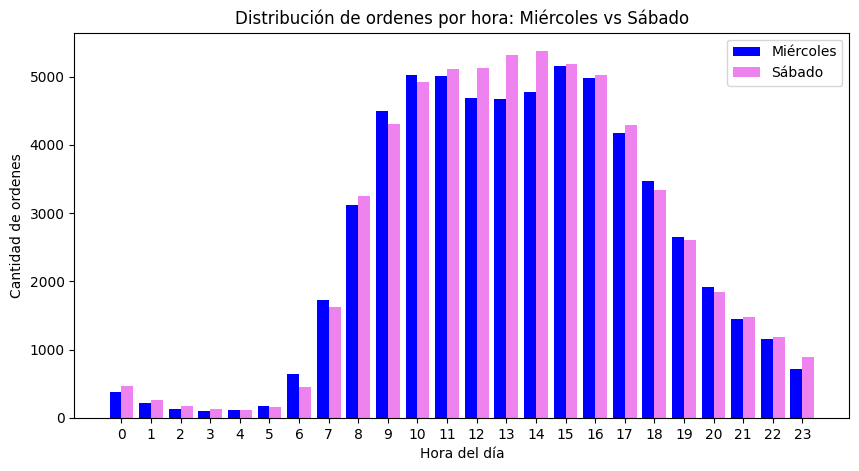

In [121]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

# Filtrar miércoles (order_dow == 3) y sábado (order_dow == 6)
wednesday_orders = orders_df[orders_df["order_dow"] == 3]["order_hour_of_day"]
saturday_orders = orders_df[orders_df["order_dow"] == 6]["order_hour_of_day"]

# Contar pedidos por hora para cada día
wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()

# Graficar ambas distribuciones
plt.figure(figsize=(10, 5))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label="Miércoles", color="blue")
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label="Sábado", color="violet")

plt.xlabel("Hora del día")
plt.ylabel("Cantidad de ordenes")
plt.title("Distribución de ordenes por hora: Miércoles vs Sábado")
plt.xticks(range(24))  #horas del día (de 0 a 23)
plt.legend()

plt.show()


Escribe aquí tus conclusiones. A primera vista no se ve in disparo alarmante en la diferencia de la cantidad de ordenes hechas entre el miércoles y sabado. Las horas en las que se hicieron más ordenes van desde kas 11am a as 2pm, hay una diferencia de alrededor de 2000 ordenes a compraración del miércoles en el m ismo rango de horas 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

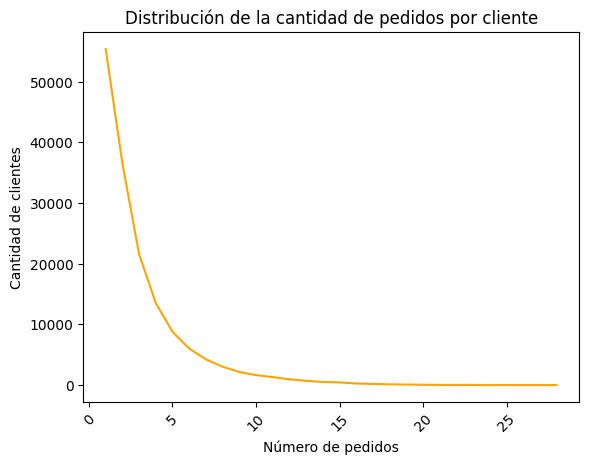

In [78]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

# Contar cuántos pedidos hizo cada cliente
customer_orders_count = orders_df.groupby('user_id')['order_id'].nunique()

# Contar la frecuencia de clientes según la cantidad de pedidos que han realizado
orders_count_distribution = customer_orders_count.value_counts().sort_index()

# Graficar la distribución
ax = orders_count_distribution.plot(color='orange', 
                                    title='Distribución de la cantidad de pedidos por cliente', 
                                    xlabel='Número de pedidos', 
                                    ylabel='Cantidad de clientes', 
                                    rot=45)

plt.show()


Escribe aquí tus conclusiones. Alrededor de 50,000  clientes hicieron entre 1-4 ordenes 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [122]:
import pandas as pd

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')
products_df = pd.read_csv('/datasets/products.csv', ';')
order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

#Cantidad de veces que aparece cada producto
product_counts = order_products_df['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'order_count']

# Unir con el DataFrame de productos para obtener los nombres
top_products = product_counts.merge(products_df, on='product_id')

top_20_products = top_products.head(20)

top_20_products[['product_id', 'product_name', 'order_count']]

,product_id,product_name,order_count
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


    Escribe aquí tus conclusiones. La nueva tabla nos nuestra el TOP 20 DE VENTAS, en la ultima columna podemos observar en cuantas ordenes X producto se repite

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

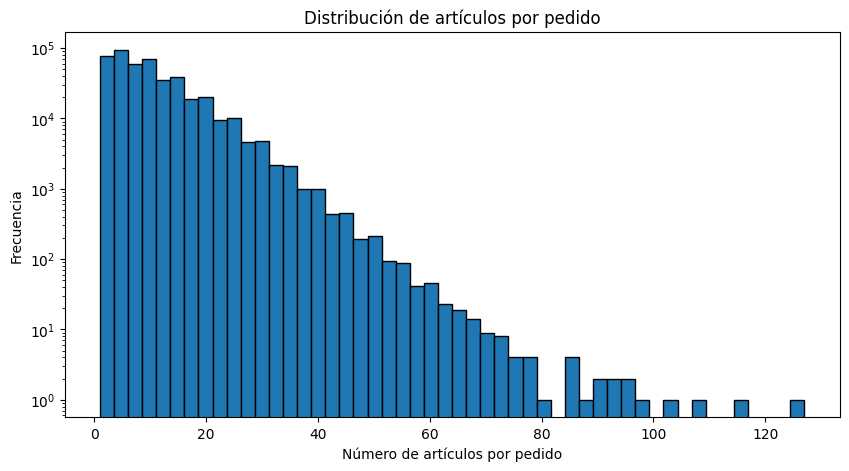

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

order_counts = order_products_df['order_id'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(order_counts, bins=50, edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de artículos por pedido')
plt.yscale('log')  
plt.show()
    
order_counts.describe()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [15]:
import pandas as pd

products_df = pd.read_csv('/datasets/products.csv', ';')
order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

reordered_products = order_products_df[order_products_df['reordered'] == 1]

top_reordered = reordered_products['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

top_reordered = top_reordered.merge(products_df[['product_id', 'product_name']], on='product_id')

display(top_reordered)

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [17]:
import pandas as pd

products_df = pd.read_csv('/datasets/products.csv', ';')
order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

total_orders = order_products_df['product_id'].value_counts()

total_reorders = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts()

reorder_ratio = (total_reorders / total_orders).fillna(0).reset_index()
reorder_ratio.columns = ['product_id', 'reorder_ratio']

reorder_ratio = reorder_ratio.merge(products_df[['product_id', 'product_name']], on='product_id')

print(reorder_ratio.sort_values(by='reorder_ratio', ascending=False).head(20))

       product_id  reorder_ratio  \
13453       14721            1.0   
19195       20949            1.0   
6136         6723            1.0   
6144         6732            1.0   
41319       45088            1.0   
41310       45078            1.0   
19258       21016            1.0   
19248       21005            1.0   
32273       35192            1.0   
32277       35197            1.0   
6211         6810            1.0   
41274       45040            1.0   
41269       45035            1.0   
25120       27373            1.0   
28203       30748            1.0   
41265       45031            1.0   
32224       35137            1.0   
28202       30747            1.0   
32304       35228            1.0   
32305       35229            1.0   

                                            product_name  
13453                            Bone Strength Take Care  
19195                           Vanilla Sandwich Cookies  
6136                                    Palmiers- Petite  
6144   

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [20]:
import pandas as pd

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')
order_products_df = pd.read_csv('/datasets/order_products.csv', ';')

order_products_df = order_products_df.merge(orders_df[['order_id', 'user_id']], on='order_id')

total_products_by_user = order_products_df.groupby('user_id')['product_id'].count()

reordered_products_by_user = order_products_df[order_products_df['reordered'] == 1].groupby('user_id')['product_id'].count()

reorder_ratio_by_user = (reordered_products_by_user / total_products_by_user).fillna(0).reset_index()
reorder_ratio_by_user.columns = ['user_id', 'reorder_ratio']

print(reorder_ratio_by_user.head(30))

    user_id  reorder_ratio
0         2       0.038462
1         4       0.000000
2         5       0.666667
3         6       0.000000
4         7       0.928571
5        11       0.200000
6        12       0.250000
7        13       0.565217
8        14       0.360656
9        15       0.538462
10       16       0.531250
11       17       0.716981
12       19       0.291667
13       20       0.000000
14       21       0.400000
15       22       1.000000
16       24       0.500000
17       26       0.437500
18       27       0.658824
19       28       0.500000
20       29       0.846154
21       30       0.000000
22       31       0.304348
23       33       0.470588
24       34       0.000000
25       35       0.484848
26       36       0.666667
27       37       0.285714
28       38       0.526316
29       40       0.416667


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [22]:
import pandas as pd

order_products_df = pd.read_csv('/datasets/order_products.csv', ';')
products_df = pd.read_csv('/datasets/products.csv', ';')

first_added = order_products_df[order_products_df['add_to_cart_order'] == 1]

top_first_added = first_added['product_id'].value_counts().head(20).reset_index()
top_first_added.columns = ['product_id', 'count']

top_first_added = top_first_added.merge(products_df[['product_id', 'product_name']], on='product_id')

print(top_first_added)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

### Conclusion general del proyecto:

In [29]:
#La mayoria de los productos que los clientes agregan a sus carriots son articulos de 'canasta basica' para completar 
#su despensa.
#Los dias en los que se concentran las ordenes son domingo y lunes, probablemete porque es incio de semana y los consumidores
#quieran estar preparados para inciar la semana 
#Existen tendencias claras en la distribucion de las ordenes y sus productos, la tendencia de las ordenes es de 5 a 20 articulos
#La informacion recabada en este analisis se podria utilizar para segmentar a los clientes segun sus habitos de consumo, 
#la frecuencia con la que ordenan y el tipo de pedido que hacen, como los que ordenan para su hogar.

